# Introduction

Welcome to the SpringRTS notebook tutorial. This should be your starting point in getting accustomed to using this project. It assumes you've succesfully installed the notebook following the instructions in the README. After you've started `jupyter notebook` and Spring with the appropriate libraries installed, you can follow the steps in this notebook.

First we should verify that everything is properly setup. We're going to execute a few commands to check if the kernel is running properly.
Let's begin with some help commands.

In [1]:
%help

SpringRTS Lua notebook<br/>To begin, write %lsmagic to see what special identifiers are available. Each code block should begin with a state identifier magic, such as: %luaui, %uluarules, and similar. This defines the Spring Lua state in which the code will be executed.<br/><br/>Additional things to note:<br/>- In case there is no state magic in the code block, the last set state will be used.<br/>- There can only be one state-magic per code block, and it must be at the beginning of the code block.<br/>- Non-state magics such as %lsmagic, %help and similar shouldn't appear along with Lua code.<br/>- Don't use local variables if you want to access them in consequitive runs. They will be out of scope.<br/>- Variable scope is shared between different notebooks.<br/>

In [2]:
%lsmagic

Available magics:<br/>%help  %lsmagics  %luamenu  %luaui  %show  %sluarules  %uluarules  _p  _s<br/><br/>%help  : show general help<br/>%lsmagics  : list all magics<br/>%luamenu LuaMenu : execute code in LuaMenu/LuaUI state, whichever is present.<br/>%luaui LuaUI : execute code in LuaMenu/LuaUI state, whichever is present.<br/>%show  : show the current screen<br/>%sluarules LuaRules Synced : execute code in synced LuaRules state<br/>%uluarules LuaRules Unsynced : execute code in unsynced LuaRules state<br/>_p  : Lua helper function to print data to the notebook<br/>_s  : Lua helper function to print the function source code

Running `%help` and `%lsmagic` gives us a basic idea on what commands are available. Both of these are the so called _magic_ commands which have a special meaning. These two in particular are executed entirely in the Python kernel and don't require Spring to be running.
We will now try to execute some SpringRTS Lua code. If these fail to execute, it means that you haven't setup the Lua libraries correctly or that Spring isn't running.

In [3]:
x = 12

LuaUI

In [4]:
_p(x) -- _p works much like Spring.Echo except it will print out the values in the Notebook

LuaUI
12<br/>

In [5]:
_p(1, 2, "abc")

LuaUI
1, 2, abc<br/>

In [6]:
x = {}
for i = 1, 15 do
    table.insert(x, i)
end
_p(x) -- it also works well with tables

LuaUI
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}<br/>

In [7]:
x = {}
for i = 1, 10000 do
    table.insert(x, i)
end
_p(x) -- and it will handle particularly long ones well

LuaUI
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100 ... 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10000}<br/>

So far we have been executing code in the default, LuaUI state. However if we want to run something in the LuaRules context, we have to specify a different state, either as a synced or unsynced gadget, with `%sluarules` and `%uluarules` respectively.

In [8]:
%sluarules
-- You may want to run /globallos before executing this command, so the heightmap change is visible

height = 200

Spring.SetHeightMapFunc(function()
    for i = 100*Game.squareSize, 200*Game.squareSize, Game.squareSize do
        for j = 100*Game.squareSize, 200*Game.squareSize, Game.squareSize do
            Spring.SetHeightMap(i, j, height)
        end
    end
end)

LuaRules Synced

SpringRTS kernel comes with a special `%show` helper function for screenshotting Spring and displaying that image in the notebook. For this it's recommended to have a version of Spring at least new as this commit: https://github.com/spring/spring/commit/fc4e5b2a9180c9aab6edc2fc20611a5df55a418a

We can now see the changes our running the previous block of code.

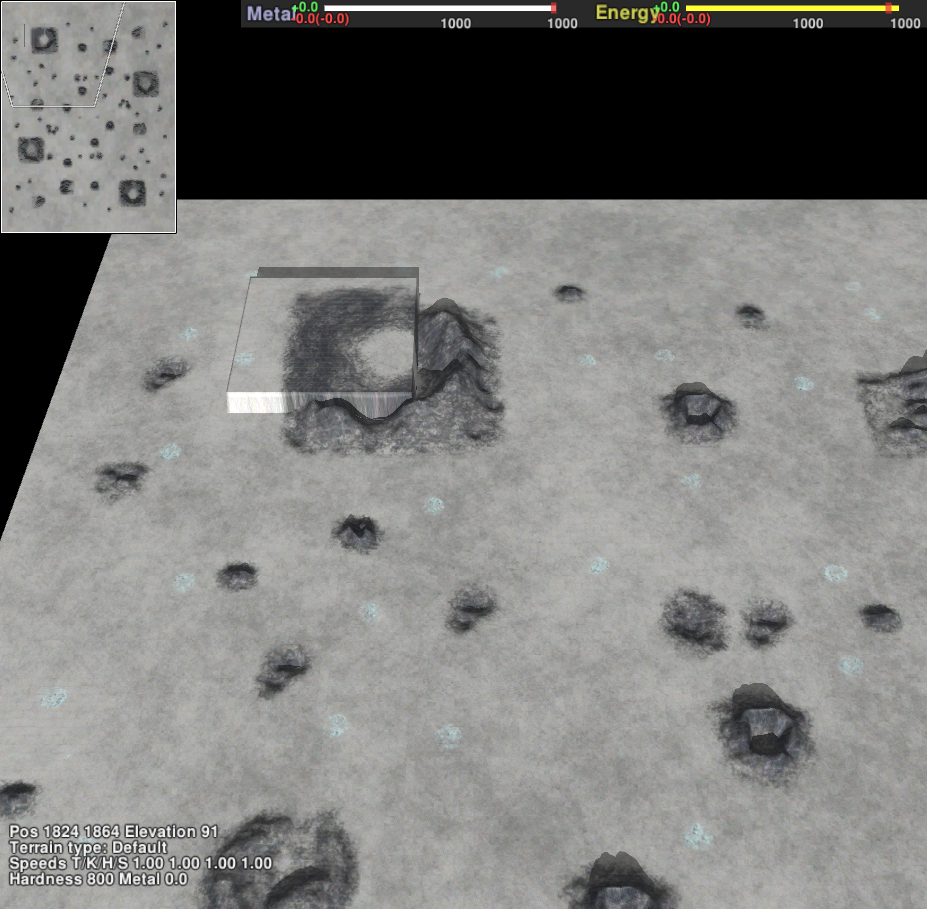

In [9]:
%show

The SpringRTS Kernel is particularly useful for modifying UI (Chili) widgets as this can be done without having to restart the engine or use `/luaui reload` all the time.
Let's create a simple Chili Window.

In [10]:
%luaui

-- Variables aren't localized because we want to access them in future runs
-- This usually isn't good practice and should be refactored when copying to script files.

Chili = WG.Chili
screen = Chili.Screen0

window = Chili.Window:New {
    x = "20%",
    y = "20%",
    width = "20%",
    height = "20%",
    parent = screen,
}

LuaUI

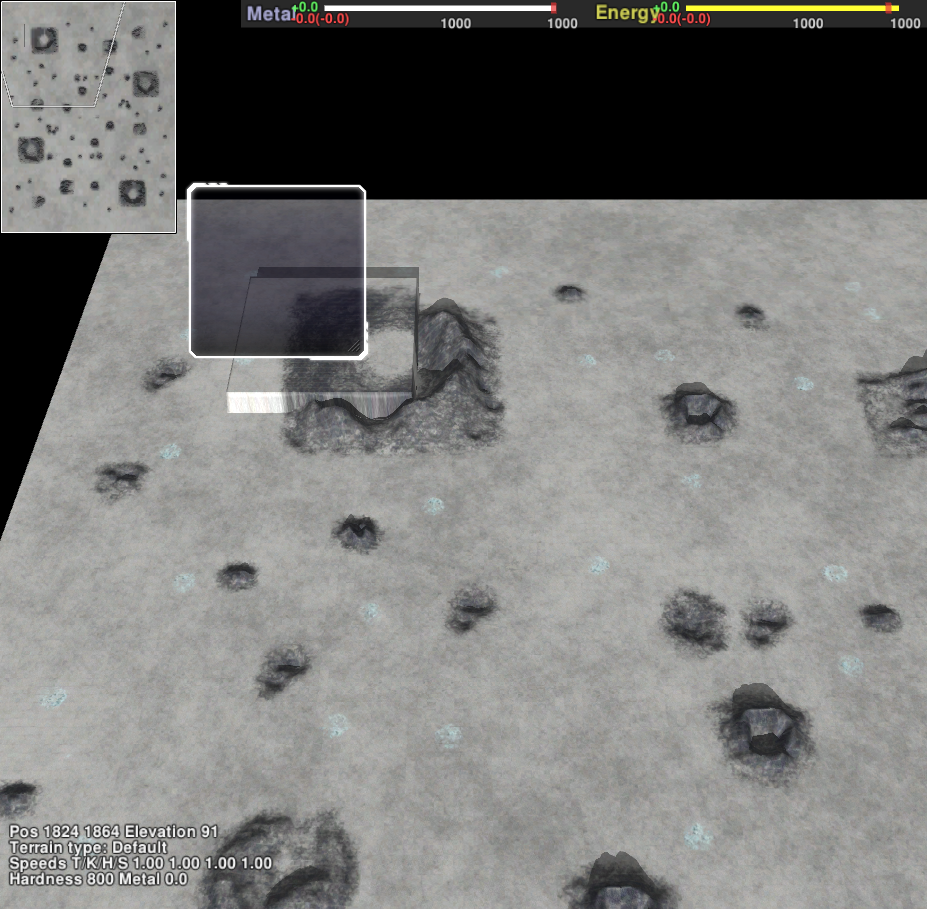

In [11]:
%show

In [12]:
-- It looks like we could make it a bit bigger
-- Normally this could be done in the original code block, but we copy it here for presentation reasons

-- Let's delete the window if it already exists so we don't create duplicates
if window then
    window:Dispose()
    window = nil
end

window = Chili.Window:New {
    x = "20%",
    y = "20%",
    width = "50%",
    height = "50%",
    parent = screen,
}

LuaUI

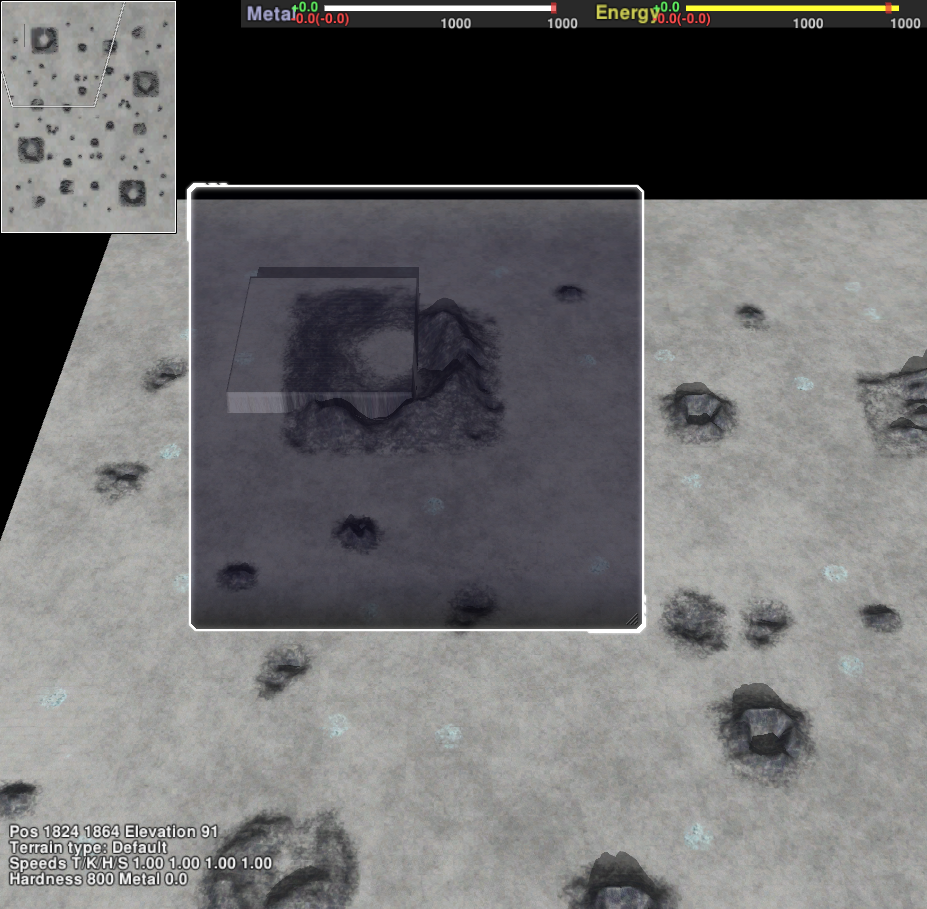

In [13]:
%show

In [14]:
-- Errors will also be displayed
-- To understand them better, let's show line numbers by entering command mode (ESC) and pressing L

-- Let's delete the window if it already exists so we don't create duplicates
if window then
    window:Dispose()
    window = nil
end

window = Chili.Window:New {
    x = "20%",
    y = "20%"
    width = "50%",
    height = "50%",
    parent = screen,
}

LuaUI
[string &quot;-- Errors will also be displayed...&quot;]:13: '}' expected (to close '{' at line 10) near 'width'

In [15]:
-- We may want to know what exactly Chili.Control.New does. 
-- In order to avoid searching for its source code manually, we can display it using the special _s command.

_s(Chili.Control.New)

LuaUI
function Control:New(obj)<br/>  --// backward compability<br/>  BackwardCompa(obj)<br/><br/>  if obj.DrawControl then<br/>    obj._hasCustomDrawControl = true<br/>  end<br/><br/>  --// load the skin for this control<br/>  obj.classname = self.classname<br/>  theme.LoadThemeDefaults(obj)<br/>  SkinHandler.LoadSkin(obj, self)<br/><br/>  --// we want to initialize the children ourself (see downwards)<br/>  local cn = obj.children<br/>  obj.children = nil<br/><br/>  obj = inherited.New(self,obj)<br/><br/>  if obj._hasCustomDrawControl then<br/>    if not obj.drawcontrolv2 then<br/>	local w = obj._widget or {whInfo = { name = &quot;unknown&quot; } }<br/>	local fmtStr = [[You are using a custom %s::DrawControl in widget &quot;%s&quot;.<br/>	Please note that with Chili 2.1 the (self.x, self.y) translation is moved a level up and does not need to be done in DrawControl anymore.<br/>	When you adjusted your code set `drawcontrolv2 = true` in the respective control to disable this message.]]<br/>	Spring.Log(&quot;Chili&quot;, &quot;warning&quot;, fmtStr:format(obj.name, w.whInfo.name))<br/>    else<br/>	obj._hasCustomDrawControl = false<br/>    end<br/>  end<br/><br/>  local p = obj.padding<br/>  if (obj.clientWidth) then<br/>    obj.width = obj.clientWidth + p[1] + p[3]<br/>  end<br/>  if (obj.clientHeight) then<br/>    obj.height = obj.clientHeight + p[2] + p[4]<br/>  end<br/><br/>  --// create font<br/>  obj.font = Font:New(obj.font)<br/>  obj.font:SetParent(obj)<br/><br/>  obj:DetectRelativeBounds()<br/>  obj:AlignControl()<br/><br/>  --// add children after UpdateClientArea! (so relative width/height can be applied correctly)<br/>  if (cn) then<br/>    for i=1,#cn do<br/>      obj:AddChild(cn[i], true)<br/>    end<br/>  end<br/><br/>  return obj<br/>end<br/><br/>

### Fin
That's it! For more information check out some Jupyter Notebook tutorials or post questions in the SpringRTS forums.